<h1><center> Clustering

<div class="alert alert-success">
Clustering is the process of trying to find structure (clusters) in data.
</div>

<div class="alert alert-info">
Clustering: https://en.wikipedia.org/wiki/Cluster_analysis
</div>

In [1]:
# Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten

Scikit-learn has a bunch of example datasets. Here, we'll use the iris dataset: which contains data about different species of plants. 

In [2]:
# Load the iris data
iris = datasets.load_iris()

In [3]:
# Check out the available features
print('\n'.join(iris.feature_names))

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [4]:
# Check out the species ('clusters')
print('\n'.join(iris.target_names))

setosa
versicolor
virginica


In [5]:
# The actual data is stored in iris.data
# Let's check how much data there is
[n_samples, n_features] = np.shape(iris.data) 
print("There are ", n_samples , " samples of data, each with " , n_features, " features.")

There are  150  samples of data, each with  4  features.


In [6]:
# Let's set up some indexes, so we know what data we're using
sl_ind = 0    # Sepal Length
sw_ind = 1    # Septal Width
pl_ind = 2    # Petal Length
pw_ind = 3    # Petal Width

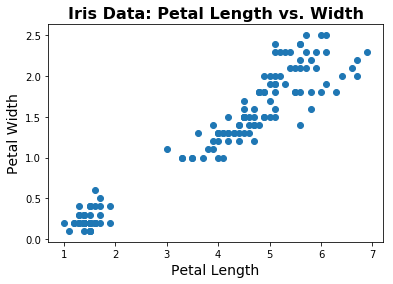

In [7]:
# Let's start looking at some data. 
# Let's start with a scatter plot of petal length vs. petal width
fig = plt.figure(1)
plt.scatter(iris.data[:, pl_ind], iris.data[:, pw_ind])

# Add title and labels
plt.title('Iris Data: Petal Length vs. Width', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length', fontsize=14);
plt.ylabel('Petal Width', fontsize=14);

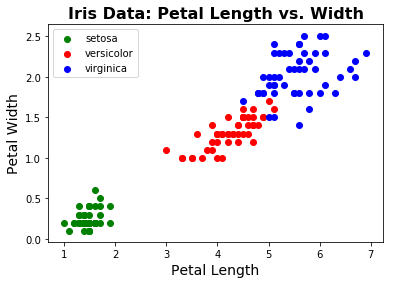

In [8]:
# Plot the data colour coded by species
fig = plt.figure(1)
plt.scatter(iris.data[:, pl_ind][iris.target==0], iris.data[:, pw_ind][iris.target==0],
            c='green', label=iris.target_names[0])
plt.scatter(iris.data[:, pl_ind][iris.target==1], iris.data[:, pw_ind][iris.target==1],
            c='red', label=iris.target_names[1])
plt.scatter(iris.data[:, pl_ind][iris.target==2], iris.data[:, pw_ind][iris.target==2],
            c='blue', label=iris.target_names[2])

# Add title, labels and legend
plt.title('Iris Data: Petal Length vs. Width', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length', fontsize=14);
plt.ylabel('Petal Width', fontsize=14);
plt.legend(scatterpoints=1, loc='upper left');

# Note that splitting up the plotting per group is basically a hack to make the legend work, 
# The following command plots the data perfectly well, colour coded by target:
#  plt.scatter(iris.data[:, petal_length_ind], iris.data[:, petal_width_ind], c=iris.target)
# However, it's a pain to get a labelled legend when plotted this way

## Task:
If we didn't already know the Species labels, we might notice that there seem to be distinct groups of datapoints. Clustering is the approach of trying to find these groups algorithmically. 

Here, we will do so with the KMeans algorithm. For information on KMeans and how it works, see the lecture. 

In [9]:
# Pull out the data of interest - Petal Length & Petal Width
d1 = np.array(iris.data[:, pl_ind])
d2 = np.array(iris.data[:, pw_ind])

#### Whitening Data:
If your different dimensions use different units (or have wildy different variances), then these differences can greatly impact the clustering. 

This is because KMeans is isotropic: it treats different in each direction as equally important. So, if the units or variance are very different, this is equivalent to weighting certain features / dimensions as more or less important. 

To correct for this it is common, and sometimes necessary to 'whiten' data: to normalize each dimension by it's respective standard deviation.  

In [10]:
# Check out the whiten function
whiten?

In [11]:
# Whiten Data
d1w = whiten(d1)
d2w = whiten(d2)

In [12]:
# Combine data into shape for skl
data = np.vstack([d1w, d2w]).T

In [13]:
# Initialize KMeans object, set to fit 3 clusters
km = KMeans(n_clusters=3, random_state=13)

In [14]:
# Fit the data with KMeans
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=13, tol=0.0001, verbose=0)

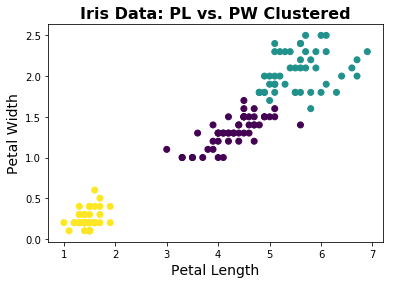

In [15]:
# Let's check out the clusters that KMeans found
plt.scatter(d1, d2, c=km.labels_);
plt.xlabel('Year');
plt.ylabel('Age');

# Add title, labels and legend
plt.title('Iris Data: PL vs. PW Clustered', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length', fontsize=14);
plt.ylabel('Petal Width', fontsize=14);

It looks like it's doing pretty well! Other than some discrepancies between the versicolor and virginica boundary, KMeans is able to reconstruct the species labels algorithmically, given only information on a couple features. 